In [1]:
import os, sys, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline 

In [99]:
folder_path = './../results/'
algorithms = ['DE/best/1/bin', 'ODE/best/1/bin', 'QODE/best/1/bin', 'CDE/best/1/bin']
dim = 30
lambda_mutation = [.5, 1, 1, 1]
init_population = [30, 30, 30, 30]
fitness_clusters = [10, 10, 10, 5]
n_runs = 51

In [100]:
df_sumup = None
regex = 'df_sumup'

for index, algorithm in enumerate(algorithms): 
    output_filepath = folder_path+algorithm

    for filename in os.listdir(output_filepath):    
        re_result = re.search(regex, filename)
        if re_result is not None:        
            dim_file = int(filename.split('_')[1])
            lambda_mutation_file = float(filename.split('_')[5])
            init_population_file = int(filename.split('_')[3])
            
            if dim_file == dim and lambda_mutation_file == lambda_mutation[index] and init_population_file == init_population[index]:     
                if 'CDE' in algorithm:
                    fitness_clusters_file = filename.split(']')[0].split('_')[-1]
                    if fitness_clusters_file != str(fitness_clusters[index]):
                        continue
                print (filename) if ('CDE' in algorithm) else None
                df_temp = pd.read_csv(output_filepath+'/'+filename, sep='\t')
                if df_sumup is None:
                    df_sumup = df_temp.copy()
                else:
                    df_sumup = pd.concat([df_sumup, df_temp]).copy()            
                run_tag = re.search('(\[.*\])', filename).group()
            
df_sumup['elapsed_time'] = df_sumup['elapsed_time'].apply(lambda x: float('{:.02f}'.format(60*int(x.split(':')[0]) + int(x.split(':')[1])+int(x.split(':')[2])/60))) 
df_sumup.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_sumup.reset_index(drop = True, inplace=True)
df_sumup.sort_values(by=['algorithm', '#Fc', 'percFES'], inplace=True)
print ('df_sumup shape: ', df_sumup.shape)

[14_30_51_30_0.01_1_False_5]df_sumup.tsv
[14_30_51_30_0.1_1_False_5]df_sumup.tsv
[14_30_51_30_0.2_1_False_5]df_sumup.tsv
[14_30_51_30_0.3_1_False_5]df_sumup.tsv
[14_30_51_30_0.4_1_False_5]df_sumup.tsv
[14_30_51_30_0.5_1_False_5]df_sumup.tsv
[14_30_51_30_0.6_1_False_5]df_sumup.tsv
[14_30_51_30_0.7_1_False_5]df_sumup.tsv
[14_30_51_30_0.8_1_False_5]df_sumup.tsv
[14_30_51_30_0.9_1_False_5]df_sumup.tsv
[14_30_51_30_1.0_1_False_5]df_sumup.tsv
[1_30_51_30_0.01_1_False_5]df_sumup.tsv
[1_30_51_30_0.1_1_False_5]df_sumup.tsv
[1_30_51_30_0.2_1_False_5]df_sumup.tsv
[1_30_51_30_0.3_1_False_5]df_sumup.tsv
[1_30_51_30_0.4_1_False_5]df_sumup.tsv
[1_30_51_30_0.5_1_False_5]df_sumup.tsv
[1_30_51_30_0.6_1_False_5]df_sumup.tsv
[1_30_51_30_0.7_1_False_5]df_sumup.tsv
[1_30_51_30_0.8_1_False_5]df_sumup.tsv
[1_30_51_30_0.9_1_False_5]df_sumup.tsv
[1_30_51_30_1.0_1_False_5]df_sumup.tsv
[2_30_51_30_0.01_1_False_5]df_sumup.tsv
[2_30_51_30_0.1_1_False_5]df_sumup.tsv
[2_30_51_30_0.2_1_False_5]df_sumup.tsv
[2_30_51_30

In [101]:
df_maxperc = pd.DataFrame(columns=['Algorithm', 'Fi - D' + str(dim), 'Best', 'Worst', 'Median', 'Mean', 'Std Dev', 'Success Rate (%)', 'Elapsed Time (min)'])
for algorithm in algorithms:     
    for index, row in df_sumup[np.logical_and(df_sumup['percFES'] == 1 , df_sumup['algorithm'] == algorithm)].iterrows():
        funcId = 'F' + str(row['#Fc'])
    #     best = '{:.2E}'.format(np.array(row[['run_' + str(x) for x in np.arange(1,51+1, 1)]]).min())
        best = np.array(row[['run_' + str(x) for x in np.arange(1,51+1, 1)]]).min()
        worst = np.array(row[['run_' + str(x) for x in np.arange(1,51+1, 1)]]).max()
        median = np.median(np.array(row[['run_' + str(x) for x in np.arange(1,51+1, 1)]]))
        mean = np.array(row[['run_' + str(x) for x in np.arange(1,51+1, 1)]]).mean()
        std = np.array(row[['run_' + str(x) for x in np.arange(1,51+1, 1)]]).std()
        successRate = np.where(row[['run_' + str(x) for x in np.arange(1,51+1, 1)]] < 1e-8)[0].shape[0]/51
        elapsed_time = row['elapsed_time']
        df_maxperc.loc[df_maxperc.shape[0]] = np.array([algorithm, funcId, best, worst, median, mean, std, successRate, elapsed_time])
    print (algorithm, df_maxperc[df_maxperc['Algorithm'] == algorithm].shape)
df_maxperc['Best']=df_maxperc['Best'].apply(lambda x: float(x))
df_maxperc.sort_values(['Algorithm', 'Best'], ascending=True, inplace=True)
df_maxperc['Best']=df_maxperc['Best'].apply(lambda x: '{:.2E}'.format(float(x)))
df_maxperc['Worst']=df_maxperc['Worst'].apply(lambda x: '{:.2E}'.format(float(x)))
df_maxperc['Median']=df_maxperc['Median'].apply(lambda x: '{:.2E}'.format(float(x)))
df_maxperc['Mean']=df_maxperc['Mean'].apply(lambda x: '{:.2E}'.format(float(x)))
df_maxperc['Std Dev']=df_maxperc['Std Dev'].apply(lambda x: '{:.2E}'.format(float(x)))
df_maxperc['Success Rate (%)']=df_maxperc['Success Rate (%)'].apply(lambda x: '{:.02f}'.format(100*float(x)))    
for algorithm in algorithms:
    output_filepath = folder_path+algorithm
    df_maxperc[df_maxperc['Algorithm'] == algorithm].to_csv(output_filepath+'/' + re.sub('\[(\d+_)', '[ALLF_', run_tag) + 'df_maxperc.csv', sep=',', index=None)    
df_maxperc.to_csv(folder_path+'General/' + re.sub('\[(\d+_)', '[ALLF_', run_tag) + 'df_maxperc.csv', sep=',', index=None)        
df_maxperc#.sort_values(['Algorithm'])

DE/best/1/bin (6, 9)
ODE/best/1/bin (6, 9)
QODE/best/1/bin (6, 9)
CDE/best/1/bin (6, 9)


,Algorithm,Fi - D30,Best,Worst,Median,Mean,Std Dev,Success Rate (%),Elapsed Time (min)
19,CDE/best/1/bin,F2,6.10E-09,9.99E-09,9.61E-09,9.44E-09,6.41E-10,100.00,252.27
21,CDE/best/1/bin,F7,8.48E-09,1.10E-01,1.48E-02,2.03E-02,2.14E-02,21.57,684.78
23,CDE/best/1/bin,F14,1.75E-01,3.85E-01,2.67E-01,2.78E-01,5.14E-02,0.00,922.18
20,CDE/best/1/bin,F6,7.46E+00,1.95E+01,1.21E+01,1.29E+01,3.04E+00,0.00,968.45
22,CDE/best/1/bin,F9,2.98E+01,2.27E+02,7.66E+01,8.10E+01,3.21E+01,0.00,887.35
18,CDE/best/1/bin,F1,6.03E+01,4.88E+04,9.60E+03,1.14E+04,1.06E+04,0.00,945.03
1,DE/best/1/bin,F2,8.05E-09,9.98E-09,9.76E-09,9.59E-09,4.57E-10,100.00,198.3
3,DE/best/1/bin,F7,8.30E-09,1.10E-01,7.40E-03,1.42E-02,1.92E-02,39.22,437.58
5,DE/best/1/bin,F14,1.39E-01,9.53E-01,3.00E-01,3.09E-01,1.16E-01,0.00,1046.48
2,DE/best/1/bin,F6,5.58E+00,2.18E+01,1.26E+01,1.28E+01,3.58E+00,0.00,603.23


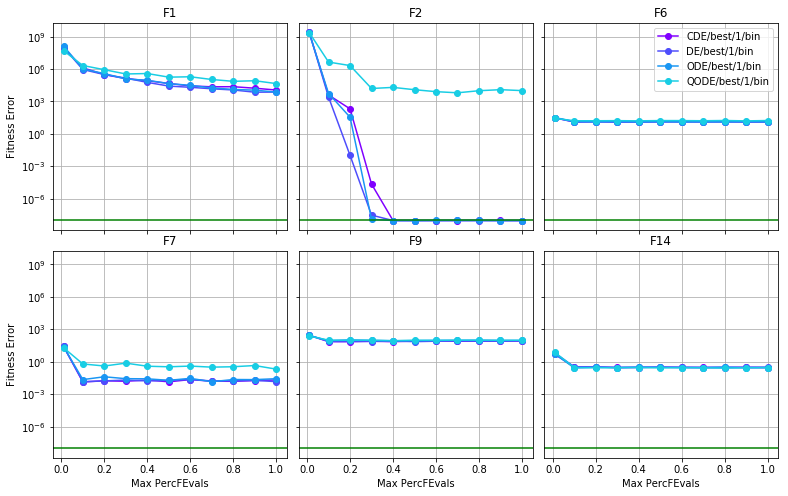

In [102]:
df_sumup['#Fc'].unique()
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(13,8), sharex=True, sharey=True)
plt.subplots_adjust(wspace=.05, hspace=.1)
color=plt.cm.rainbow(np.linspace(0,1,len(algorithms)+7))
for i, ax_i in enumerate(ax.flatten()):
    func_id = df_sumup['#Fc'].unique()[i]    
    for j, algorithm in enumerate(df_sumup['algorithm'].unique()):
#         print (func_id, algorithm)
        df_sumup_filtered = df_sumup[np.logical_and(df_sumup['algorithm'] == algorithm, df_sumup['#Fc'] == func_id)].copy()
        arr_percFes = np.array(df_sumup_filtered['percFES'])
        arr_mean = np.array(df_sumup_filtered[['run_' + str(x) for x in np.arange(1,51+1, 1)]].mean(axis=1))        
        ax_i.plot(arr_percFes, arr_mean, '-o', color=color[j], label = algorithm)        
    ax_i.grid(True)
    ax_i.set_yscale('log')    
    ax_i.set_title('F' + str(func_id))
    if (i == 2):
        ax_i.legend()
    ax_i.axhline(1e-8, c='green')
    if (i == 0 or i == ax.shape[0]+1):
        ax_i.set_ylabel('Fitness Error')
    if (i > 2):
        ax_i.set_xlabel('Max PercFEvals')
    
fig.savefig(folder_path+'General/' + re.sub('\[(\d+_)', '[ALLF_', run_tag) + 'mean_maxFES.jpeg', bbox_inches = 'tight')

In [103]:
df_sumup.tail()

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
138,QODE/best/1/bin,14,30,0.6,0.141474,0.331025,0.264960,0.298102,0.189984,0.228611,...,0.234989,0.287514,0.200025,0.348066,0.272131,0.244288,0.321717,0.284200,322.72,175530
139,QODE/best/1/bin,14,30,0.7,0.297816,0.263967,0.200554,0.242289,0.274887,0.235237,...,0.330059,0.253545,0.235047,0.236478,0.307045,0.288659,0.297403,0.272746,366.30,204780
140,QODE/best/1/bin,14,30,0.8,0.302552,0.302629,0.218860,0.261974,0.255670,0.288090,...,0.348050,0.306297,0.287124,0.376687,0.227723,0.228163,0.270498,0.252352,411.67,234030
141,QODE/best/1/bin,14,30,0.9,0.313653,0.279998,0.266037,0.216031,0.258059,0.199303,...,0.273444,0.124500,0.185620,0.312728,0.254529,0.276921,0.296059,0.277649,442.97,263250
142,QODE/best/1/bin,14,30,1.0,0.361328,0.181745,0.345273,0.225116,0.287819,0.714271,...,0.347388,0.373424,0.322536,0.307211,0.215792,0.234593,0.248956,0.280728,475.47,292500


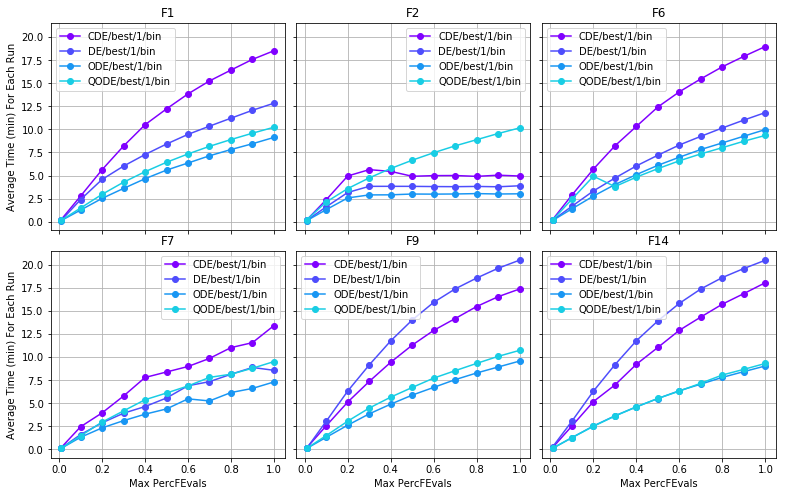

In [104]:
df_sumup['#Fc'].unique()
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(13,8), sharex=True, sharey=True)
plt.subplots_adjust(wspace=.05, hspace=.1)
color=plt.cm.rainbow(np.linspace(0,1,len(algorithms)+7))
for i, ax_i in enumerate(ax.flatten()):
    func_id = df_sumup['#Fc'].unique()[i]    
    for j, algorithm in enumerate(df_sumup['algorithm'].unique()):
        df_sumup_filtered = df_sumup[np.logical_and(df_sumup['algorithm'] == algorithm, df_sumup['#Fc'] == func_id)].copy()
        arr_percFes = np.array(df_sumup_filtered['percFES'])
        arr_mean = np.array(df_sumup_filtered['elapsed_time']/n_runs)        
        ax_i.plot(arr_percFes, arr_mean, '-o', color=color[j], label = algorithm)        
    ax_i.grid(True)
    ax_i.set_title('F' + str(func_id))
    ax_i.legend()    
    if (i == 0 or i == ax.shape[0]+1):
        ax_i.set_ylabel('Average Time (min) For Each Run')
    if (i > 2):
        ax_i.set_xlabel('Max PercFEvals')
    
fig.savefig(folder_path+'General/' + re.sub('\[(\d+_)', '[ALLF_', run_tag) + 'average_run_time.jpeg', bbox_inches = 'tight')

In [109]:
from utils import getOppositeNumber, getQuasiOppositeNumber
from population import Population

In [242]:
pop = Population(dimension=2, lowerLimit=-100, upperLimit=100, initialPopulation=5).create()
pop_op = getOppositeNumber(pop, infLim=-100, supLim=100)
pop_qop = getQuasiOppositeNumber(pop, infLim=-100, supLim=100)

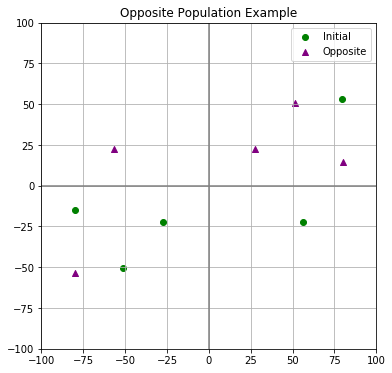

In [261]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
ax.scatter(pop[:,0], pop[:,1], label='Initial', c='green')
ax.scatter(pop_op[:,0], pop_op[:,1], marker='^', label='Opposite', c='purple')
# ax.scatter(pop_qop[:,0], pop_qop[:,1], marker='o', label='Quasi-Opposite', c='blue')
ax.axhline(0, c='gray'), ax.axvline(0, c='gray')
ax.set_xlim(-100, 100), ax.set_ylim(-100, 100)
ax.legend()
ax.set_title('Opposite Population Example')
ax.grid(True)
fig.savefig(folder_path+'General/opposite_population_example.jpeg', bbox_inches = 'tight')

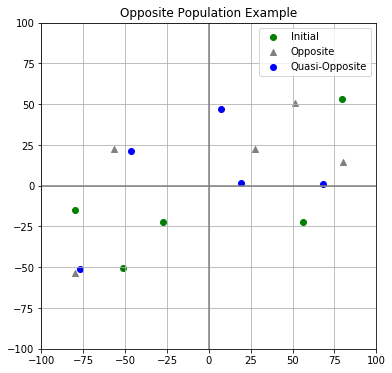

In [266]:
qtd_points = 5
pop_group = [pop[:qtd_points,0], pop[:qtd_points,1]]
pop_op_group = [pop_op[:qtd_points,0], pop_op[:qtd_points,1]]
pop_qop_group = [pop_qop[:qtd_points,0], pop_qop[:qtd_points,1]]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
ax.scatter(pop_group[0], pop_group[1], label='Initial', c='green')
ax.scatter(pop_op_group[0], pop_op_group[1], marker='^', label='Opposite', c='gray')
ax.scatter(pop_qop_group[0], pop_qop_group[1], marker='o', label='Quasi-Opposite', c='blue')
ax.axhline(0, c='gray'), ax.axvline(0, c='gray')
ax.set_xlim(-100, 100), ax.set_ylim(-100, 100)
ax.legend()
ax.set_title('Opposite Population Example')
ax.grid(True)
fig.savefig(folder_path+'General/quasi_opposite_population_example.jpeg', bbox_inches = 'tight')

### Cluster

In [300]:
initPop = 10
cluster = [Population(dimension=2, lowerLimit=-60, upperLimit=-80, initialPopulation=initPop).create(),
          Population(dimension=2, lowerLimit=50, upperLimit=60, initialPopulation=initPop).create(),
          Population(dimension=2, lowerLimit=-10, upperLimit=10, initialPopulation=initPop).create(),
          Population(dimension=2, lowerLimit=-100, upperLimit=100, initialPopulation=initPop+3).create()]

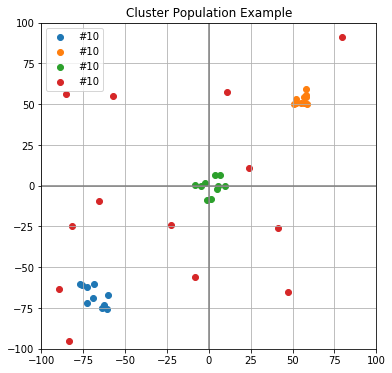

In [304]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
for points in cluster:
    ax.scatter(points[:,0], points[:,1], label='#{}'.format(initPop))
ax.axhline(0, c='gray'), ax.axvline(0, c='gray')
ax.set_xlim(-100, 100), ax.set_ylim(-100, 100), ax.legend()
ax.set_title('Cluster Population Example')
ax.grid(True)
fig.savefig(folder_path+'General/clustered_population_example.jpeg', bbox_inches = 'tight')